# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
# custom dtypes for data
from scripts.utils_data import DTYPES_SIMPLE
from scripts.utils_visualizations import show_distribution
from scripts.utils_data import range_without_outliers

## Constants 

In [3]:
PATH_SIMPLE = '../data/processed/electronics_simple.csv'

## Load Data

In [4]:
df = pd.read_csv(PATH_SIMPLE,
                 low_memory=True,
                 dtype=DTYPES_SIMPLE)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739590 entries, 0 to 6739589
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   overall      int16 
 1   vote         int64 
 2   reviewMonth  int16 
 3   reviewText   object
 4   reviewYear   int16 
dtypes: int16(3), int64(1), object(1)
memory usage: 141.4+ MB


In [6]:
df.head()

,overall,vote,reviewMonth,reviewText,reviewYear
0,5,67,9,This is the best novel I have read in 2 or 3 y...,1999
1,3,5,10,"Pages and pages of introspection, in the style...",2013
2,5,4,9,This is the kind of novel to read when you hav...,2008
3,5,13,9,What gorgeous language! What an incredible wri...,2000
4,3,8,2,I was taken in by reviews that compared this b...,2000


## Visualizations

In [7]:
# Calculate distribution
rating_cnt = df.overall.value_counts()
vote_cnt = df.vote.value_counts()
month_cnt = df.reviewMonth.value_counts()
year_cnt = df.reviewYear.value_counts()

df_vote_pos = pd.cut(df.vote.values,
                     bins=[0,1,float("inf")],
                     right=False,
                     labels=['No','Yes']).value_counts()

# calculating char length
df['textLength'] = df.reviewText.str.len()

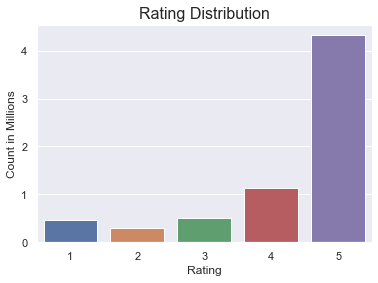

In [8]:
show_distribution(rating_cnt, 'Rating Distribution', 'Rating', normalize=1_000_000, norm_name='Millions')
plt.show()

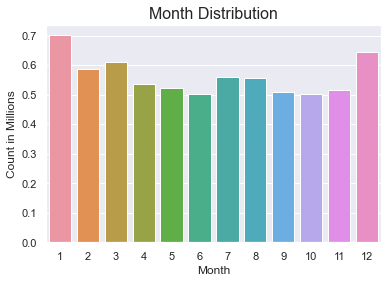

In [9]:
show_distribution(month_cnt, 'Month Distribution', 'Month', normalize=1_000_000, norm_name='Millions')
plt.show()

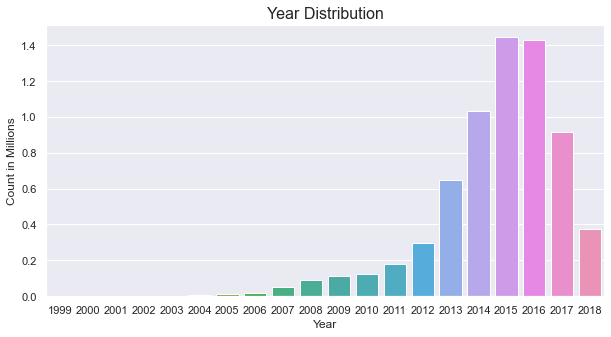

In [10]:
show_distribution(year_cnt, 'Year Distribution', 'Year',
                  normalize=1_000_000, norm_name='Millions',
                  figsize=(10,5))
plt.show()

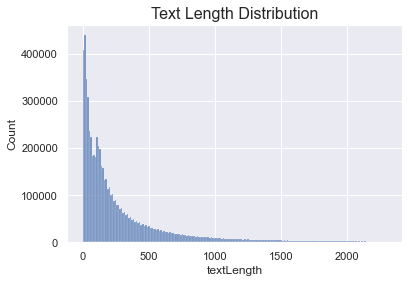

In [11]:
sns.histplot(x=df.textLength,
             bins=200,
             binrange=range_without_outliers(df.textLength, lower=0.))
plt.title("Text Length Distribution", fontsize=16)
plt.show()

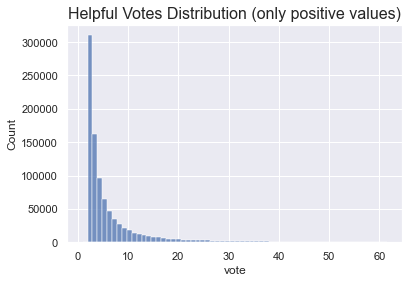

In [12]:
sns.histplot(x=df.vote,
             bins=62,
             binrange=range_without_outliers(df.vote, lower=1.))
plt.title("Helpful Votes Distribution (only positive values)", fontsize=16)
plt.show()

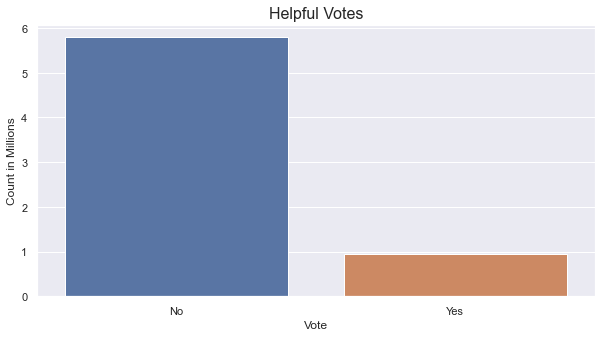

In [13]:
show_distribution(df_vote_pos, 'Helpful Votes', 'Vote',
                  normalize=1_000_000, norm_name='Millions',
                  figsize=(10,5))
plt.show()